# Statistically meaningful charts

## Seaborn

The next module we will explore is Seaborn. Seaborn is a Python visualization library based on matplotlib. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels. It provides a high-level interface for drawing attractive statistical graphics... emphasis on STATISTICS. You don't want to use Seaborn as a general purpose charting libray.

http://web.stanford.edu/~mwaskom/software/seaborn/index.html


In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

sns.set(color_codes=True)
warnings.filterwarnings("ignore")

### Load up some test data to play with

In [2]:
tips = pd.read_csv('input/tips.csv')

tips['tip_percent'] = (tips['tip'] / tips['total_bill'] * 100)

tips.head()

,total_bill,tip,gender,ordered_alc_bev,day,time,party_size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,Yes,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,Yes,Sun,Dinner,4,14.680765


In [3]:
tips.describe()

,total_bill,tip,party_size,tip_percent
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,3.262130,2.569672,19.543686
std,8.902412,1.441227,0.951100,12.716390
min,3.070000,1.010000,1.000000,3.452931
25%,13.347500,2.220475,2.000000,12.225831
50%,17.795000,3.156900,2.000000,16.654586
75%,24.127500,3.942075,3.000000,22.816970
max,50.810000,11.016200,6.000000,110.384365


### Plotting linear regression

http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html



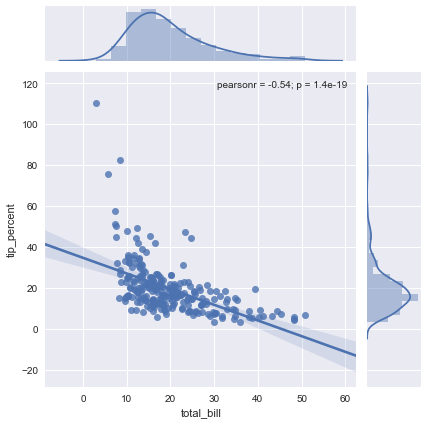

In [4]:
sns.jointplot("total_bill", "tip_percent", tips, kind='reg');

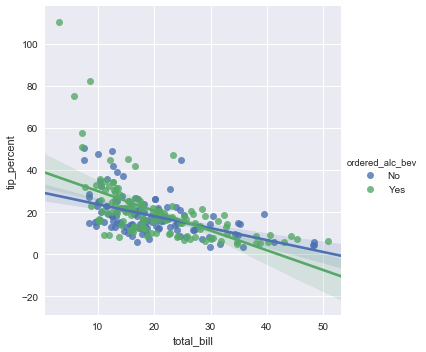

In [5]:
sns.lmplot(x="total_bill", y="tip_percent", hue="ordered_alc_bev", data=tips)

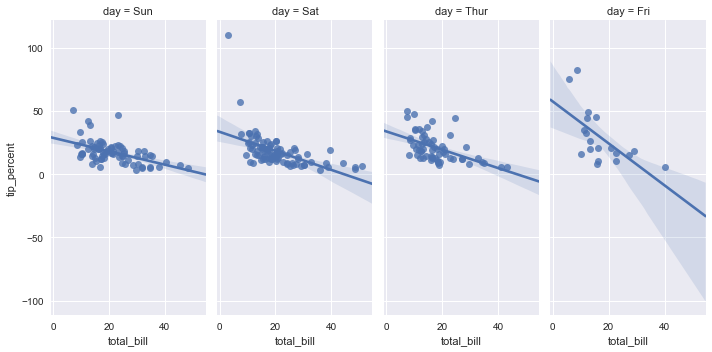

In [6]:
sns.lmplot(x="total_bill", y="tip_percent", col="day", data=tips, aspect=.5)

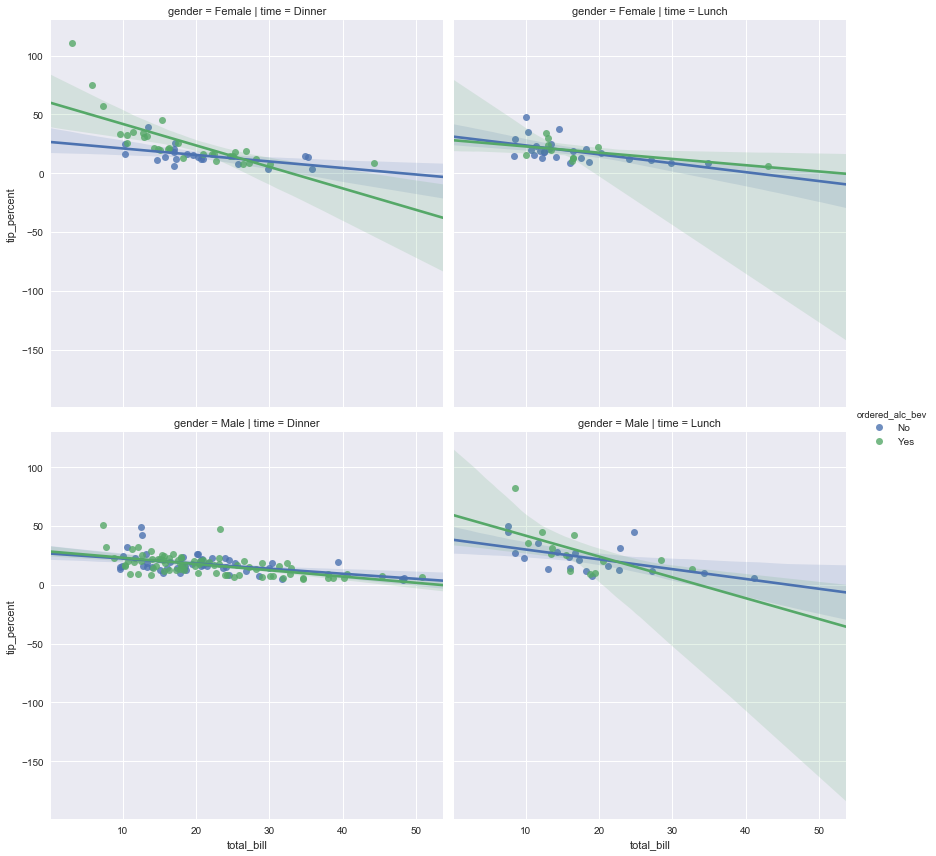

In [7]:
sns.lmplot(x="total_bill", y="tip_percent", hue='ordered_alc_bev', col="time", row='gender', size=6, data=tips);

### Plotting logistic regression

http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html



In [8]:
# Let's add some calculated columns
tips['tip_above_avg'] = np.where(tips['tip_percent'] >= tips['tip_percent'].mean(), 1, 0)
tips.replace({'Yes': 1, 'No': 0}, inplace=True)

tips.head()

,total_bill,tip,gender,ordered_alc_bev,day,time,party_size,tip_percent,tip_above_avg
0,16.99,1.01,Female,0,Sun,Dinner,2,5.944673,0
1,10.34,1.66,Male,1,Sun,Dinner,3,16.054159,0
2,21.01,3.50,Male,0,Sun,Dinner,3,16.658734,0
3,23.68,3.31,Male,0,Sun,Dinner,2,13.978041,0
4,24.59,3.61,Female,1,Sun,Dinner,4,14.680765,0


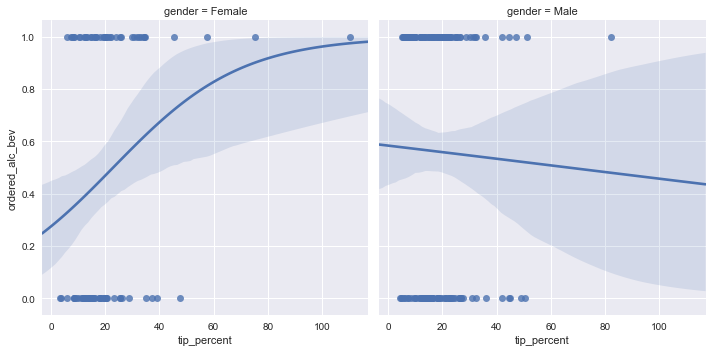

In [9]:
sns.lmplot(x="tip_percent", y="ordered_alc_bev", col='gender', data=tips, logistic=True)

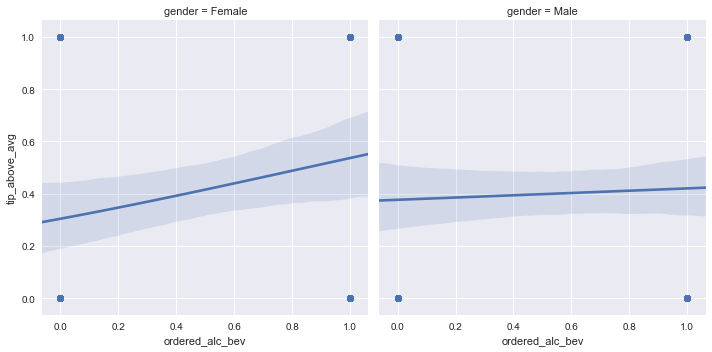

In [10]:
sns.lmplot(x="ordered_alc_bev", y="tip_above_avg", col='gender', data=tips, logistic=True)